## Exercise 03 — Bar charts

Average hourly commits split between working days and weekends.

In [8]:
import pandas as pd
import sqlite3

DB_PATH = '../data/checking-logs.sqlite'


In [9]:
with sqlite3.connect(DB_PATH) as connection:
    commits = pd.read_sql_query(
        """
        SELECT timestamp
        FROM checker
        WHERE uid LIKE 'user_%'
        """,
        connection,
        parse_dates=['timestamp'],
    )

commits.head()


,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [10]:
commits['date'] = commits['timestamp'].dt.date
commits['hour'] = commits['timestamp'].dt.hour
commits['day_type'] = commits['timestamp'].dt.dayofweek.map(
    lambda day: 'weekend' if day >= 5 else 'working_day'
)

per_day_hour = (
    commits
    .groupby(['day_type', 'date', 'hour'])
    .size()
    .reset_index(name='commits')
)
hourly_avg = (
    per_day_hour
    .groupby(['day_type', 'hour'])['commits']
    .mean()
    .unstack('day_type')
    .reindex(range(24), fill_value=0.0)
)
hourly_avg = hourly_avg.reindex(columns=['working_day', 'weekend'], fill_value=0.0)
hourly_avg.head()


day_type,working_day,weekend
hour,,
0,3.0,2.0
1,NaN,6.0
2,0.0,0.0
3,2.0,1.0
4,0.0,0.0


<Axes: title={'center': 'weekend'}, xlabel='hour'>

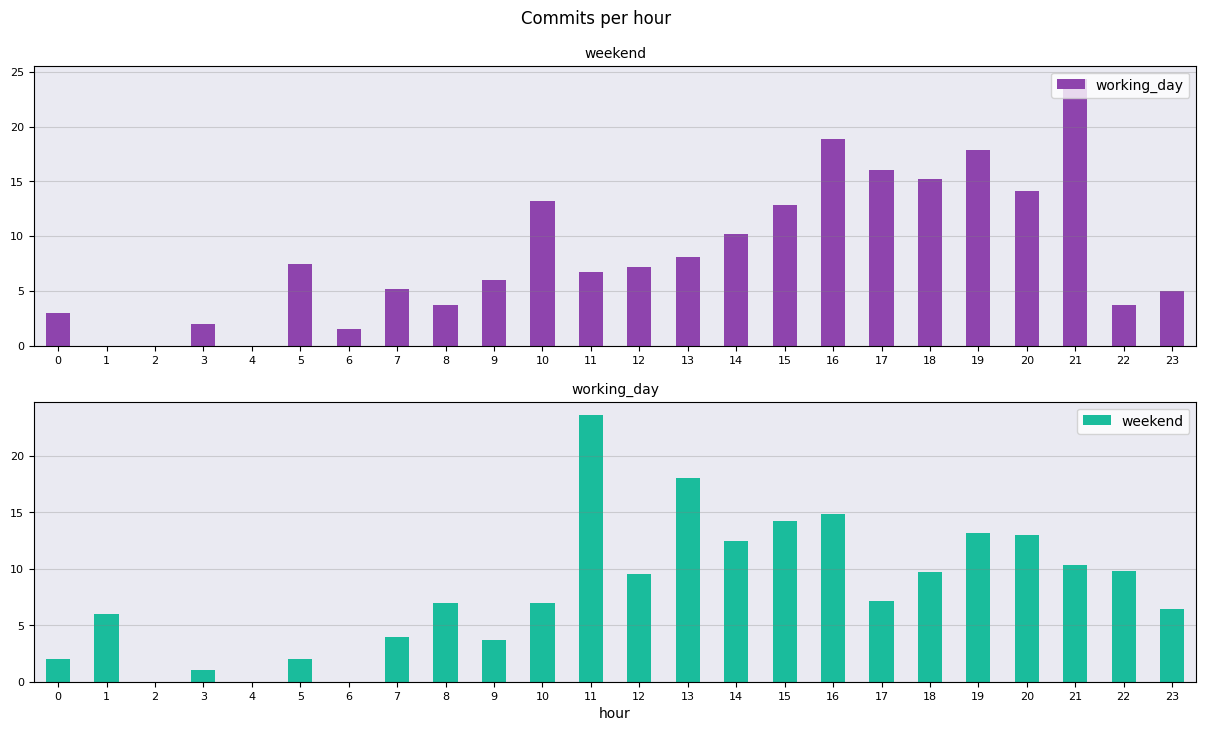

In [11]:
plot_data = hourly_avg[['weekend', 'working_day']]
palette = ['#8e44ad', '#1abc9c']
axes = hourly_avg.plot(
    kind='bar',
    subplots=True,
    sharex=True,
    figsize=(15, 8),
    fontsize=8,
    color=palette,
    legend=True,
    rot=0
)
axes[0].set_title('weekend', fontsize=10)
axes[1].set_title('working_day', fontsize=10)

axes[0].tick_params(labelbottom=True) 

for ax in axes:
    ax.set_ylabel('', fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis='y', color='gray', alpha=0.3)
    ax.legend(loc='upper right') 
    ax.set_facecolor('#EAEAF2')
axes[0].figure.suptitle('Commits per hour', fontsize=12, y=0.95)
axes[0]


In [12]:
peak_working_hour = int(hourly_avg['working_day'].idxmax())
peak_weekend_hour = int(hourly_avg['weekend'].idxmax())
peak_working_hour, peak_weekend_hour


(21, 11)

**Is the dynamic different on working days and weekends?**  
Working days peak around hour 21, while weekends peak around hour 11, so the dynamics differ.